# 1. Data and Methods

## 1.1 Data Presentation

In [1]:
# Importing the necessary libraries

import glob
import pandas as pd
import xml.etree.ElementTree as ET
from datetime import datetime

In [2]:
# Importing the necessary sheets seperately from the excel file

# Importing the Orders data sheet
Orders_data = pd.read_excel('Global Superstore Lite.xlsx', sheet_name='Orders')

# Importing the Returns data sheet
Returns_data = pd.read_excel('Global Superstore Lite.xlsx', sheet_name='Returns')

# Importing the People data sheet
People_data = pd.read_excel('Global Superstore Lite.xlsx', sheet_name='People')

## 1.1.1 Describing Data Source

In [3]:
# Inserting the necessary data in order to describe the Data Source

# Describing the Data
data_source = "Minger Company (internal data)"
data_type = "Transactional data"
no_of_sheets = "3 Sheets as Orders, Returns and People"
no_of_data_in_orders = "999 Data rows"
no_of_data_in_returns = "4 Data rows"
no_of_data_in_people = "13 Data rows"
time_period = "2011-01-08 to 2014-12-31"

# Printing the data description 
BOLD = '\033[1m'
END = '\033[0m'

print(f"Data Source            :  {data_source}")
print(f"Data Type              :  {data_type}")
print(f"No. of Sheets          :  {no_of_sheets}")
print(f"No. of Data in Orders  :  {no_of_data_in_orders}")
print(f"No. of Data in Returns :  {no_of_data_in_returns}")
print(f"No. of Data in People  :  {no_of_data_in_people}")
print(f"Time period of Data    :  {time_period}")

Data Source            :  Minger Company (internal data)
Data Type              :  Transactional data
No. of Sheets          :  3 Sheets as Orders, Returns and People
No. of Data in Orders  :  999 Data rows
No. of Data in Returns :  4 Data rows
No. of Data in People  :  13 Data rows
Time period of Data    :  2011-01-08 to 2014-12-31


## 1.1.2 Data Summary

In [4]:
# Loading each sheet of your Excel file into separate DataFrames
Orders_data = pd.read_excel('Global Superstore Lite.xlsx', sheet_name='Orders')

# Getting basic information for each sheet
print("Orders data")
print(f"  - Number of Transactions: {len(Orders_data)}")
print(f"  - Number of Products: {Orders_data['Product ID'].nunique()}")
print(f"  - Relevant Attributes:", ", ".join(Orders_data.columns))

# Definning key variables based on your analysis goals
key_variables = ["Order ID", "Customer ID", "Product ID", "Product Priority"]

# Printing information about key variables
print("\nKey Variables:")
for var in key_variables:
  print(f"  - {var}")

Orders data
  - Number of Transactions: 999
  - Number of Products: 718
  - Relevant Attributes: Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, City, State, Country, Postal Code, Market, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority

Key Variables:
  - Order ID
  - Customer ID
  - Product ID
  - Product Priority


In [5]:
# Loading each sheet of your Excel file into separate DataFrames
Returns_data = pd.read_excel('Global Superstore Lite.xlsx', sheet_name='Returns')

# Getting basic information for each sheet
print("Returns data:")
print(f"  - Number of Transactions: {len(Returns_data)}")
print(f"  - Number of Orders: {Returns_data['Order ID'].nunique()}")
print(f"  - Relevant Attributes:", ", ".join(Returns_data.columns))

# Definning key variables based on your analysis goals
key_variables = ["Order ID"]

# Printing information about key variables
print("\nKey Variables:")
for var in key_variables:
  print(f"  - {var}")

Returns data:
  - Number of Transactions: 4
  - Number of Orders: 4
  - Relevant Attributes: Returned, Order ID, Market

Key Variables:
  - Order ID


In [6]:
# Loading each sheet of your Excel file into separate DataFrames
People_data = pd.read_excel('Global Superstore Lite.xlsx', sheet_name='People')

# Getting basic information for each sheet
print("People data:")
print(f"  - Number of Transactions: {len(People_data)}")
print(f"  - Number of People: {People_data['Person'].nunique()}")
print(f"  - Relevant Attributes:", ", ".join(People_data.columns))

# Definning key variables based on your analysis goals
key_variables = ["Person"]

# Printing information about key variables
print("\nKey Variables:")
for var in key_variables:
  print(f"  - {var}")

People data:
  - Number of Transactions: 13
  - Number of People: 13
  - Relevant Attributes: Person, Region

Key Variables:
  - Person


## 1.1.3 Data Quality Assessing - Orders

In [7]:
# Getting general information about the DataFrame

print("\nData Frame Info:")
Orders_data.info()


Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          999 non-null    int64         
 1   Order ID        999 non-null    object        
 2   Order Date      999 non-null    datetime64[ns]
 3   Ship Date       999 non-null    datetime64[ns]
 4   Ship Mode       999 non-null    object        
 5   Customer ID     999 non-null    object        
 6   Customer Name   999 non-null    object        
 7   Segment         999 non-null    object        
 8   City            999 non-null    object        
 9   State           999 non-null    object        
 10  Country         999 non-null    object        
 11  Postal Code     196 non-null    float64       
 12  Market          999 non-null    object        
 13  Region          999 non-null    object        
 14  Product ID      999 non-null    object  

In [8]:
# Checking for missing values

print("Missing Values:")
for col in Orders_data.columns:
  # Counting the number of missing values per column
  missing_count = Orders_data[col].isnull().sum()
  # Printing the column name and number of missing values
  print(f"  - Column '{col}': {missing_count} missing values")

Missing Values:
  - Column 'Row ID': 0 missing values
  - Column 'Order ID': 0 missing values
  - Column 'Order Date': 0 missing values
  - Column 'Ship Date': 0 missing values
  - Column 'Ship Mode': 0 missing values
  - Column 'Customer ID': 0 missing values
  - Column 'Customer Name': 0 missing values
  - Column 'Segment': 0 missing values
  - Column 'City': 0 missing values
  - Column 'State': 0 missing values
  - Column 'Country': 0 missing values
  - Column 'Postal Code': 803 missing values
  - Column 'Market': 0 missing values
  - Column 'Region': 0 missing values
  - Column 'Product ID': 0 missing values
  - Column 'Category': 0 missing values
  - Column 'Sub-Category': 0 missing values
  - Column 'Product Name': 0 missing values
  - Column 'Sales': 0 missing values
  - Column 'Quantity': 0 missing values
  - Column 'Discount': 0 missing values
  - Column 'Profit': 0 missing values
  - Column 'Shipping Cost': 0 missing values
  - Column 'Order Priority': 0 missing values


In [9]:
# Removing the Postal Code column
Orders_data = Orders_data.drop('Postal Code', axis=1)

In [10]:
# Checking for data inconsistencies 

print("\nData Type Inconsistencies:")
for col in Orders_data.columns:
  # Getting the expected data type
  expected_type = 'int64'  
  if Orders_data[col].dtype != expected_type:
    print(f"  - Column '{col}': Expected type {expected_type}, Actual type {Orders_data[col].dtype}")


Data Type Inconsistencies:
  - Column 'Order ID': Expected type int64, Actual type object
  - Column 'Order Date': Expected type int64, Actual type datetime64[ns]
  - Column 'Ship Date': Expected type int64, Actual type datetime64[ns]
  - Column 'Ship Mode': Expected type int64, Actual type object
  - Column 'Customer ID': Expected type int64, Actual type object
  - Column 'Customer Name': Expected type int64, Actual type object
  - Column 'Segment': Expected type int64, Actual type object
  - Column 'City': Expected type int64, Actual type object
  - Column 'State': Expected type int64, Actual type object
  - Column 'Country': Expected type int64, Actual type object
  - Column 'Market': Expected type int64, Actual type object
  - Column 'Region': Expected type int64, Actual type object
  - Column 'Product ID': Expected type int64, Actual type object
  - Column 'Category': Expected type int64, Actual type object
  - Column 'Sub-Category': Expected type int64, Actual type object
  - Co

In [11]:
# Checking for invalid values

start_date = pd.to_datetime('2011-01-08')
end_date = pd.to_datetime('2014-12-31')

# Filtering data within the date range
filtered_data = Orders_data[(Orders_data['Order Date'] >= start_date) & (Orders_data['Order Date'] <= end_date)]

# Counting data points outside the date range
out_of_range_count = len(Orders_data) - len(filtered_data)

# Printing information about data outside the date range
print("\nData Outside Date Range:")
print(f"  - Number of rows outside the date range (2011-01-08 to 2014-12-31): {out_of_range_count}")


Data Outside Date Range:
  - Number of rows outside the date range (2011-01-08 to 2014-12-31): 1


In [12]:
# Checking for negative order quantities

print("\nInvalid Values:")
invalid_count = (Orders_data['Quantity'] < 0).sum()

if invalid_count > 0:
  print(f"  - Column 'Order Quantity': {invalid_count} negative values found")
else:
  print(f"  - Column 'Order Quantity': No negative values found")


Invalid Values:
  - Column 'Order Quantity': No negative values found


In [13]:
# Checking for outliers
# Identifying outliers using IQR

Q1 = Orders_data['Sales'].quantile(0.25)
Q3 = Orders_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding outlier order IDs and sort them in descending order

outlier_order_ids = Orders_data[
    (Orders_data['Sales'] < lower_bound) | (Orders_data['Sales'] > upper_bound)
]['Order ID'].sort_values(ascending=False).tolist()

# Printing information about outliers

print(f"\nOutliers (IQR method): {len(outlier_order_ids)} potential outliers in 'Sales'")
if outlier_order_ids:
  print(f"Order IDs of outliers (descending order):")
  print(*outlier_order_ids, sep='\n')  # Print each order ID on a new line


Outliers (IQR method): 38 potential outliers in 'Sales'
Order IDs of outliers (descending order):
US-2014-168116
US-2013-143819
US-2013-140158
US-2013-107440
US-2012-128587
SA-2014-1270
MO-2014-2000
IN-2014-77017
IN-2014-76016
IN-2014-66615
IN-2014-56206
IN-2013-83191
IN-2013-71249
IN-2013-50809
IN-2013-13891
IN-2012-86369
IN-2012-51810
IN-2012-26274
IN-2011-35178
ID-2011-64599
ES-2014-5530354
ES-2014-3785216
ES-2014-1651774
ES-2013-3939561
ES-2013-2860574
ES-2012-5877219
ES-2011-2257437
CA-2014-166709
CA-2014-143112
CA-2014-138289
CA-2014-135909
CA-2013-143714
CA-2013-118689
CA-2013-117121
CA-2012-145352
CA-2011-145541
CA-2011-139892
CA-2011-116904


In [14]:
# Removing outliers one by one

if outlier_order_ids:
  print("Removing outliers (order IDs):")
  for order_id in outlier_order_ids:
    print(f"  - Removing order ID: {order_id}")
    Orders_data = Orders_data[Orders_data['Order ID'] != order_id]  # Remove row with this order ID

# Printing information after removal

print(f"\n{len(Orders_data)} rows remaining after outlier removal")

Removing outliers (order IDs):
  - Removing order ID: US-2014-168116
  - Removing order ID: US-2013-143819
  - Removing order ID: US-2013-140158
  - Removing order ID: US-2013-107440
  - Removing order ID: US-2012-128587
  - Removing order ID: SA-2014-1270
  - Removing order ID: MO-2014-2000
  - Removing order ID: IN-2014-77017
  - Removing order ID: IN-2014-76016
  - Removing order ID: IN-2014-66615
  - Removing order ID: IN-2014-56206
  - Removing order ID: IN-2013-83191
  - Removing order ID: IN-2013-71249
  - Removing order ID: IN-2013-50809
  - Removing order ID: IN-2013-13891
  - Removing order ID: IN-2012-86369
  - Removing order ID: IN-2012-51810
  - Removing order ID: IN-2012-26274
  - Removing order ID: IN-2011-35178
  - Removing order ID: ID-2011-64599
  - Removing order ID: ES-2014-5530354
  - Removing order ID: ES-2014-3785216
  - Removing order ID: ES-2014-1651774
  - Removing order ID: ES-2013-3939561
  - Removing order ID: ES-2013-2860574
  - Removing order ID: ES-2012-

In [15]:
# Checking for Uniqueness

duplicate_count = Orders_data.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count} rows found")


Duplicate Rows: 0 rows found


In [16]:
# Checking for number of unique values in Customer ID

unique_count = Orders_data['Customer ID'].nunique()
print(f"\nUnique Customer IDs: {unique_count}")


Unique Customer IDs: 613


In [17]:
# Descriptive statistics

print("\nDescriptive Statistics:")
print(Orders_data.describe(include='all')) 


Descriptive Statistics:
              Row ID       Order ID                     Order Date  \
count     960.000000            960                            960   
unique           NaN            916                            NaN   
top              NaN  IN-2011-10286                            NaN   
freq             NaN              4                            NaN   
mean    24874.669792            NaN  2013-05-17 15:57:00.000000256   
min        58.000000            NaN            2011-01-07 00:00:00   
25%     14820.250000            NaN            2012-06-19 00:00:00   
50%     24496.000000            NaN            2013-06-26 00:00:00   
75%     33904.500000            NaN            2014-05-26 12:00:00   
max     51284.000000            NaN            2014-12-31 00:00:00   
std     12971.495699            NaN                            NaN   

                            Ship Date    Ship Mode Customer ID  \
count                             960          960         960   
un

In [18]:
# Saving the cleaned DataFrame to a new CSV file

Orders_data.to_csv("Processed_data_orders.csv", index=False)

# 1.1.3 Data Quality Assessing - Returns

In [19]:
# Getting general information about the DataFrame

print("\nData Frame Info:")
Returns_data.info()


Data Frame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Returned  4 non-null      object
 1   Order ID  4 non-null      object
 2   Market    4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [20]:
# Checking for missing values
# Assuming you loaded your data into a DataFrame

print("Missing Values:")
for col in Returns_data.columns:
  # Counting the number of missing values per column
  missing_count = Returns_data[col].isnull().sum()
  # Printing the column name and number of missing values
  print(f"  - Column '{col}': {missing_count} missing values")

Missing Values:
  - Column 'Returned': 0 missing values
  - Column 'Order ID': 0 missing values
  - Column 'Market': 0 missing values


In [21]:
# Checking for data inconsistencies 

print("\nData Type Inconsistencies:")
for col in Returns_data.columns:
  # Getting the expected data type (replace 'expected_type' with your expectation)
  expected_type = 'int64'  # Example: Expecting integer data
  if Returns_data[col].dtype != expected_type:
    print(f"  - Column '{col}': Expected type {expected_type}, Actual type {Returns_data[col].dtype}")



Data Type Inconsistencies:
  - Column 'Returned': Expected type int64, Actual type object
  - Column 'Order ID': Expected type int64, Actual type object
  - Column 'Market': Expected type int64, Actual type object


In [22]:
print("\nInvalid Values:")

# Checking for "no" in the 'Returns' column
invalid_count_returns = (Returns_data['Returned'] == "no").sum()

# Printing message based on invalid value count
if invalid_count_returns > 0:
  print(f"  - Column 'Returned': {invalid_count_returns} 'no' values found")
else:
  print("  - No invalid values found")


Invalid Values:
  - No invalid values found


In [23]:
# Checking for Duplicates

duplicate_count = Returns_data.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count} rows found")


Duplicate Rows: 0 rows found


In [24]:
# Checking for number of unique values in Customer ID

unique_count = Returns_data['Order ID'].nunique()
print(f"\nUnique Order IDs: {unique_count}")


Unique Order IDs: 4


In [25]:
# Descriptive statistics

print("\nDescriptive Statistics:")
print(Returns_data.describe(include='all'))  # For all data types


Descriptive Statistics:
       Returned        Order ID Market
count         4               4      4
unique        1               4      3
top         Yes  CA-2012-124891  LATAM
freq          4               1      2


In [26]:
# Saving the cleaned DataFrame to a new CSV file

Returns_data.to_csv("Processed_data_returns.csv", index=False)

# 1.1.3 Data Quality Assessing - People

In [27]:
# Checking for missing values

print("Missing Values:")
for col in People_data.columns:
  # Count the number of missing values per column
  missing_count = People_data[col].isnull().sum()
  # Print the column name and number of missing values
  print(f"  - Column '{col}': {missing_count} missing values")


Missing Values:
  - Column 'Person': 0 missing values
  - Column 'Region': 0 missing values


In [28]:
# Checking for data inconsistencies 

print("\nData Type Inconsistencies:")
for col in People_data.columns:
  # Getting the expected data type (replace 'expected_type' with your expectation)
  expected_type = 'int64'  # Example: Expecting integer data
  if People_data[col].dtype != expected_type:
    print(f"  - Column '{col}': Expected type {expected_type}, Actual type {People_data[col].dtype}")



Data Type Inconsistencies:
  - Column 'Person': Expected type int64, Actual type object
  - Column 'Region': Expected type int64, Actual type object


In [29]:
# Checking for Uniqueness

duplicate_count = People_data.duplicated().sum()
print(f"\nDuplicate Rows: {duplicate_count} rows found")


Duplicate Rows: 0 rows found


In [30]:
# Saving the cleaned DataFrame to a new CSV file (replace with desired format)

People_data.to_csv("Processed_data_people.csv", index=False)

In [31]:
# Definning the list of CSV filename
csv_filenames = ["Processed_data_orders.csv", "Processed_data_returns.csv", "Processed_data_people.csv"]

# Creating an empty list to store the DataFrames
dataframes = []

# Reading each CSV file into a pandas DataFrame
for filename in csv_filenames:
    try:
        df = pd.read_csv(filename)
        dataframes.append(df)
    except FileNotFoundError:
        print(f"Error: File '{filename}' not found. Skipping...")

# Checking if any files were successfully read
if not dataframes:
    print("Error: No CSV files were found. Please check the filenames and try again.")
    exit()

# Concatenating the DataFrames vertically (all rows stacked)
combined_df = pd.concat(dataframes, ignore_index=True)  # Avoid duplicate indices

# Specifying the output filename and file format (CSV or Excel)
output_filename = 'Processed_GlobalSuperstoreLite.csv'  # Change to 'combined_data.xlsx' for Excel
output_format = 'csv'  # Change to 'xlsx' for Excel

# Saving the combined DataFrame to the desired format
combined_df.to_csv(output_filename, index=False) if output_format == 'csv' else combined_df.to_excel(output_filename, index=False)

print(f"Combined data successfully saved to '{output_filename}'.")


Combined data successfully saved to 'Processed_GlobalSuperstoreLite.csv'.


In [32]:
!pip install mlxtend

In [33]:
# Importing necessary libraries

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [34]:
# Loading the dataset (replace "Global Superstore lite.xlsx" with your dataset)
data = pd.read_csv('Processed_GlobalSuperstoreLite.csv')

# Creating a DataFrame from the dataset
df = pd.DataFrame(data)

# Identifying repeated order IDs
repeated_order_ids = df[df.duplicated(subset=['Order ID'], keep=False)]['Order ID'].unique()

# Filtering the DataFrame to keep only rows with repeated order IDs
df_repeated_orders = df[df['Order ID'].isin(repeated_order_ids)]

# Converting Order ID and Sub-Category into a list of lists format
basket = (df_repeated_orders.groupby(['Order ID', 'Sub-Category'])['Row ID']
.count().unstack().reset_index().fillna(0)
.set_index('Order ID'))

# Converting counts to binary values (0 or 1)
transaction_df = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generating frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Printing frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Printing association rules
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
     support                     itemsets
0   0.142857                (Accessories)
1   0.190476                 (Appliances)
2   0.214286                  (Bookcases)
3   0.261905                     (Chairs)
4   0.285714                    (Copiers)
5   0.214286                   (Machines)
6   0.380952                     (Phones)
7   0.071429                    (Storage)
8   0.023810                   (Supplies)
9   0.095238                     (Tables)
10  0.023810    (Appliances, Accessories)
11  0.047619        (Chairs, Accessories)
12  0.047619      (Machines, Accessories)
13  0.023810        (Tables, Accessories)
14  0.023810      (Bookcases, Appliances)
15  0.023810         (Chairs, Appliances)
16  0.023810        (Appliances, Copiers)
17  0.095238         (Appliances, Phones)
18  0.023810          (Bookcases, Chairs)
19  0.095238         (Bookcases, Copiers)
20  0.023810          (Bookcases, Phones)
21  0.023810        (Bookcases, Supplies)
22  0.023810   

C:\Users\SENUL LAKSINDU\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


C:\Users\SENUL LAKSINDU\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
     support                     itemsets
0   0.142857                (Accessories)
1   0.190476                 (Appliances)
2   0.214286                  (Bookcases)
3   0.261905                     (Chairs)
4   0.285714                    (Copiers)
5   0.214286                   (Machines)
6   0.380952                     (Phones)
7   0.071429                    (Storage)
8   0.023810                   (Supplies)
9   0.095238                     (Tables)
10  0.023810    (Appliances, Accessories)
11  0.047619        (Chairs, Accessories)
12  0.047619      (Machines, Accessories)
13  0.023810        (Tables, Accessories)
14  0.023810      (Bookcases, Appliances)
15  0.023810         (Chairs, Appliances)
16  0.023810        (Appliances, Copiers)
17  0.095238         (Appliances, Phones)
18  0.023810          (Bookcases, Chairs)
19  0.095238         (Bookcases, Copiers)
20  0.023810          (Bookcases, Phones)
21  0.023810        (Bookcases, Supplies)
22  0.023810   

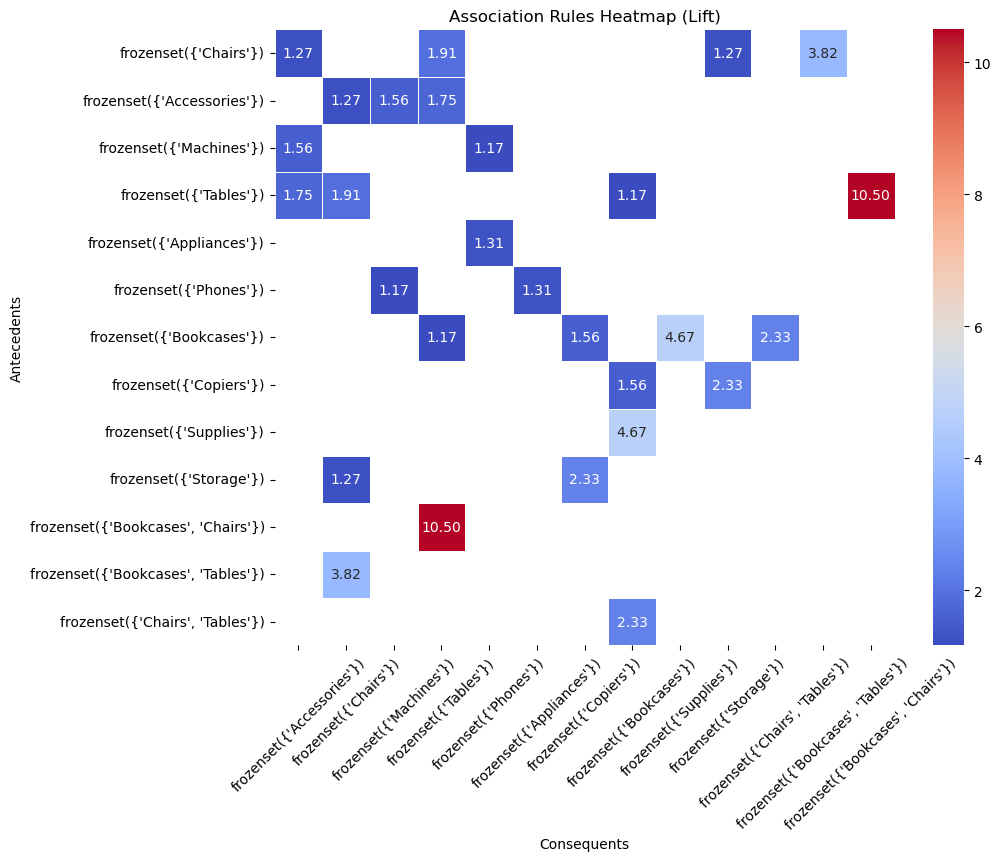

In [35]:
# Importing necessary libraries

# Loading the dataset (replace "Global Superstore lite.xlsx" with your dataset)
data = pd.read_csv('Processed_GlobalSuperstoreLite.csv')

# Creating a DataFrame from the dataset
df = pd.DataFrame(data)

# Identifying repeated order IDs
repeated_order_ids = df[df.duplicated(subset=['Order ID'], keep=False)]['Order ID'].unique()

# Filtering the DataFrame to keep only rows with repeated order IDs
df_repeated_orders = df[df['Order ID'].isin(repeated_order_ids)]

# Converting Order ID and Sub-Category into a list of lists format
basket = (df_repeated_orders.groupby(['Order ID', 'Sub-Category'])['Row ID']
.count().unstack().reset_index().fillna(0)
.set_index('Order ID'))

# Converting counts to binary values (0 or 1)
transaction_df = basket.applymap(lambda x: 1 if x > 0 else 0)

# Generating frequent itemsets
frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# Generating association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Printing frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets)

# Printing association rules
print("\nAssociation Rules:")
print(rules)


import seaborn as sns
import matplotlib.pyplot as plt

# Pivoting the association rules DataFrame for better visualization
pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Association Rules Heatmap (Lift)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [36]:
# Converting non-boolean types to boolean
transaction_df = transaction_df.astype(bool)

# Replacing non-zero values with True and zero values with False
transaction_df = transaction_df.applymap(lambda x: True if x != 0 else False)

# Performing association rule mining
frequent_itemsets = apriori(transaction_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Displaying the association rules with support, confidence, and lift
print("Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])



Association Rules:
    antecedents   consequents   support  confidence      lift
0  (Appliances)      (Phones)  0.095238    0.500000  1.312500
1      (Phones)  (Appliances)  0.095238    0.250000  1.312500
2   (Bookcases)     (Copiers)  0.095238    0.444444  1.555556
3     (Copiers)   (Bookcases)  0.095238    0.333333  1.555556
4    (Machines)      (Phones)  0.095238    0.444444  1.166667
5      (Phones)    (Machines)  0.095238    0.250000  1.166667


In [39]:
import numpy as np  # Import numpy library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Assuming you have already loaded your transaction data into transaction_df
# Convert non-boolean types to boolean (assuming this step is necessary)
transaction_df = transaction_df.astype(bool)

def calculate_error_margins(transaction_df, iterations=1000, confidence_level=0.95):
  """
  This function calculates error margins for association rules using bootstrapping.

  Args:
      transaction_df (pandas.DataFrame): The DataFrame containing transaction data.
      iterations (int, optional): The number of bootstrap samples to draw. Defaults to 1000.
      confidence_level (float, optional): The confidence level for error margins. Defaults to 0.95.

  Returns:
      list: A list of error margins for each rule.
  """
  error_margins = []
  for index, rule in rules.iterrows():
    confidences = []
    for _ in range(iterations):
      # Generating bootstrap sample
      bootstrap_sample = transaction_df.sample(n=len(transaction_df), replace=True)
      # Performing association rule mining on bootstrap sample
      bootstrap_frequent_itemsets = apriori(bootstrap_sample, min_support=0.05, use_colnames=True)
      bootstrap_rules = association_rules(bootstrap_frequent_itemsets, metric="confidence", min_threshold=0.5)
      # Finding confidence for the rule in the bootstrap sample
      matching_rule = bootstrap_rules[(bootstrap_rules['antecedents'] == rule['antecedents']) & (bootstrap_rules['consequents'] == rule['consequents'])]
      if len(matching_rule) > 0:
        confidences.append(matching_rule.iloc[0]['confidence'])
    # Calculating error margin using percentile method
    lower_bound = np.percentile(confidences, (1 - confidence_level) / 2 * 100)  # Use np.percentile
    upper_bound = np.percentile(confidences, (1 + confidence_level) / 2 * 100)  # Use np.percentile
    error_margin = (upper_bound - lower_bound) / 2
    error_margins.append(error_margin)
  return error_margins

# Performing association rule mining
frequent_itemsets = apriori(transaction_df, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Calculating error margins for association rules
error_margins = calculate_error_margins(transaction_df)  # Pass transaction_df directly

# Adding error margins to the rules DataFrame
rules['error_margin'] = error_margins

# Displaying rules with error margins
print(rules)


    antecedents consequents  antecedent support  consequent support   support  \
0  (Appliances)    (Phones)            0.190476            0.380952  0.095238   

   confidence    lift  leverage  conviction  zhangs_metric  error_margin  
0         0.5  1.3125  0.022676    1.238095       0.294118      0.195556  
